# Class 11

## Mar. 26, 2024

By the end of this class, you'll be able to:

- Load in spatial data

- Join geodataframes with attribute tables

- Plot maps in multiple ways

- Get some knowledge about clustering (will talk about it next week!)

In [ ]:
# ## Let's install and then load libraries
# %pip install geopandas
# %pip install mapclassify
# %pip install contextily
# %pip install libpysal
# %pip install esda
# %pip install splot
# %pip install xlrd
# %pip install numba==0.53

In [1]:
# Let's start with importing the packages

import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import mapclassify
import esda
import splot
import libpysal as lps
import contextily as cx
import xlrd

# A review of spatial data and mapping

### Let's bring in the same files we worked with last week

We'll be working with the Toronto Neighbourhoods spatial data and the health data today:
- `Toronto_Neighbourhoods.geojson`

- `1_ahd_neighb_db_ast_hbp_mhv_copd_2007.xls`

### 1. Using GeoPandas to load in spatial data

In [2]:
nbrhd = gpd.GeoDataFrame.from_file("Toronto_Neighbourhoods.geojson")

The content of the spatial data

In [3]:
nbrhd.head(2)

,AREA_ATTR_ID,AREA_DESC,AREA_ID,AREA_LONG_CODE,AREA_NAME,AREA_SHORT_CODE,CLASSIFICATION,CLASSIFICATION_CODE,LATITUDE,LONGITUDE,OBJECTID,PARENT_AREA_ID,Shape__Area,Shape__Length,X,Y,_id,geometry
0,26005521,Casa Loma (96),2480141,096,Casa Loma (96),096,None,None,None,None,17545105,None,3.678385e+06,8214.176485,None,None,1,"POLYGON ((-79.41469 43.67391, -79.41485 43.674..."
1,26005520,Annex (95),2480140,095,Annex (95),095,None,None,None,None,17545121,None,5.337192e+06,10513.883143,None,None,2,"POLYGON ((-79.39414 43.66872, -79.39588 43.668..."


What is geometry?

In [4]:
first_neighbor = nbrhd.loc[0,'geometry']
print(first_neighbor)

POLYGON ((-79.41469317817781 43.6739104164259, -79.41484930122832 43.6743388247927, -79.4155279126094 43.67606998537741, -79.4157867581137 43.6767302521386, -79.4164385645546 43.6783329020511, -79.4165782543862 43.6787785512344, -79.4167583944682 43.6792484522149, -79.41698203537291 43.6798247440047, -79.4170902471251 43.6801047004014, -79.4174797570886 43.681051830379, -79.4176666295158 43.6815699096212, -79.4176976020857 43.68163169892501, -79.4178116560388 43.6819252777403, -79.4181213711598 43.6827105222857, -79.4182734938897 43.6830961662335, -79.418301440907 43.683167503583, -79.4184313411692 43.6834966841996, -79.4184870757371 43.6836294842548, -79.4185410795905 43.6837582054538, -79.4184092922561 43.683786393574, -79.4182955283344 43.6834937157887, -79.4154265333151 43.684065660547, -79.4135200432832 43.6844456915062, -79.4134087861596 43.6844695957643, -79.4134686959176 43.6846245536214, -79.4124643275333 43.6848288476745, -79.4118960009694 43.6849418545125, -79.4126020656339 

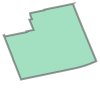

In [5]:
first_neighbor

Another example of geometry

In [6]:
rails =  gpd.GeoDataFrame.from_file("toronto_rails.geojson")
print(rails.loc[0,'geometry'])

MULTILINESTRING ((-79.5125670999999 43.814361500000075, -79.51253669999994 43.81447250000008, -79.512524 43.81452850000005, -79.51251939999992 43.814607, -79.51251739999992 43.814716900000064, -79.51252729999993 43.814817, -79.51254659999995 43.81492840000004, -79.51261019999993 43.815184800000054, -79.51270719999991 43.815575100000046, -79.51291559999993 43.816454400000055, -79.51339439999992 43.81834120000008, -79.51371579999994 43.819633, -79.513803 43.820002, -79.51385459999995 43.82019790000004, -79.51389059999991 43.820318, -79.51392659999993 43.82045130000006))


In [7]:
first_rail_points = [(-79.5125670999999,43.814361500000075),
                    (-79.51253669999994, 43.81447250000008),
                    (-79.512524, 43.81452850000005),
                    (-79.51251939999992,43.814607),
                    (-79.51251739999992,43.814716900000064),
                    (-79.51252729999993,43.814817),
                    (-79.51254659999995,43.81492840000004),
                    (-79.51261019999993,43.815184800000054),
                    (-79.51270719999991,43.815575100000046), 
                    (-79.51291559999993,43.816454400000055), 
                    (-79.51339439999992,43.81834120000008), 
                    (-79.51371579999994,43.819633), 
                    (-79.513803,43.820002), 
                    (-79.51385459999995, 43.82019790000004), 
                    (-79.51389059999991, 43.820318), 
                    (-79.51392659999993, 43.82045130000006),]
x, y = zip(* first_rail_points)
x

(-79.5125670999999,
 -79.51253669999994,
 -79.512524,
 -79.51251939999992,
 -79.51251739999992,
 -79.51252729999993,
 -79.51254659999995,
 -79.51261019999993,
 -79.51270719999991,
 -79.51291559999993,
 -79.51339439999992,
 -79.51371579999994,
 -79.513803,
 -79.51385459999995,
 -79.51389059999991,
 -79.51392659999993)

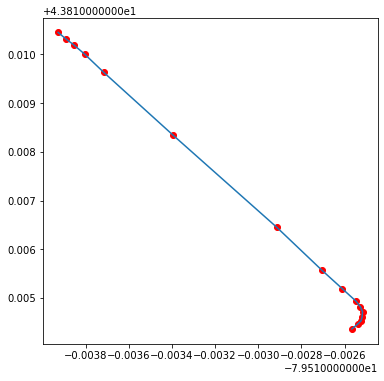

In [8]:
fig, axes = plt.subplots(1, 1, figsize = (6,6))

plt.plot(x,y)
plt.scatter(x, y, c='red');

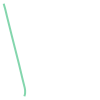

In [9]:
rails.loc[0,'geometry']

Note: the difference between plotting on Cartesian coordinate system and plotting as a geo-object comes from the different coordination system used by the GeoDataFrame.

In [10]:
rails.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

Therefore, a `GeoDataframe` can be understood as a `GeoSeries` with several `DataFrame` `Series`.

![figure](dataframe.svg)

### 2. Simplify the geodataframe

In [11]:
nbrhd.columns

Index(['AREA_ATTR_ID', 'AREA_DESC', 'AREA_ID', 'AREA_LONG_CODE', 'AREA_NAME',
       'AREA_SHORT_CODE', 'CLASSIFICATION', 'CLASSIFICATION_CODE', 'LATITUDE',
       'LONGITUDE', 'OBJECTID', 'PARENT_AREA_ID', 'Shape__Area',
       'Shape__Length', 'X', 'Y', '_id', 'geometry'],
      dtype='object')

In [12]:
# important columns
important_spat_cols = nbrhd.columns[[4, 5, 17]]
important_spat_cols

Index(['AREA_NAME', 'AREA_SHORT_CODE', 'geometry'], dtype='object')

In [13]:
# rename dictionary
colnames_spat = {important_spat_cols[0]: 'name',
           important_spat_cols[1] : 'nbrhd_spat_id',
           important_spat_cols[2] : 'geometry'}
colnames_spat

{'AREA_NAME': 'name',
 'AREA_SHORT_CODE': 'nbrhd_spat_id',
 'geometry': 'geometry'}

In [14]:
# Selec the important columns
nbrhd_simple = nbrhd.copy()
nbrhd_simple = nbrhd_simple[important_spat_cols]
nbrhd_simple.rename(columns = colnames_spat, inplace=True)
nbrhd_simple.head()

,name,nbrhd_spat_id,geometry
0,Casa Loma (96),096,"POLYGON ((-79.41469 43.67391, -79.41485 43.674..."
1,Annex (95),095,"POLYGON ((-79.39414 43.66872, -79.39588 43.668..."
2,Caledonia-Fairbank (109),109,"POLYGON ((-79.46021 43.68156, -79.46044 43.681..."
3,Woodbine Corridor (64),064,"POLYGON ((-79.31485 43.66674, -79.31660 43.666..."
4,Lawrence Park South (103),103,"POLYGON ((-79.41096 43.70408, -79.41165 43.703..."


Convert our spatial ID from a string to a number:

- rembmer the type of spatial ID in the health dataset is `int` but here in spatial dataset it is `string`.

In [15]:
#create a new variable in the nbrhd_simple geodataframe and store the new number
#version of the neighbourhood id here
nbrhd_simple["Neighbid"] = nbrhd_simple["nbrhd_spat_id"].astype(int)

nbrhd_simple.head()

,name,nbrhd_spat_id,geometry,Neighbid
0,Casa Loma (96),096,"POLYGON ((-79.41469 43.67391, -79.41485 43.674...",96
1,Annex (95),095,"POLYGON ((-79.39414 43.66872, -79.39588 43.668...",95
2,Caledonia-Fairbank (109),109,"POLYGON ((-79.46021 43.68156, -79.46044 43.681...",109
3,Woodbine Corridor (64),064,"POLYGON ((-79.31485 43.66674, -79.31660 43.666...",64
4,Lawrence Park South (103),103,"POLYGON ((-79.41096 43.70408, -79.41165 43.703...",103


In [16]:
print(type(nbrhd_simple.loc[0,'nbrhd_spat_id']))
print(type(nbrhd_simple.loc[0,'Neighbid']))

<class 'str'>
<class 'numpy.int64'>


### 3. Import health information and simplify it

In [26]:
fname = '1_ahd_neighb_db_ast_hbp_mhv_copd_2007.xls' #file name
sname = '1_ahd_neighb_asthma_2007' #sheet name in excel file

#store excel sheet with asthma data in a dataframe variable
asthma_neighb = pd.read_excel(fname, sheet_name = sname, header = 11)

In [18]:
asthma_neighb.head(2)

,Unnamed: 0,Unnamed: 1,Demographics ª,% With asthma,LL (95% CI),UL (95% CI),Demographics ª.1,% With asthma.1,LL (95% CI) .1,UL (95% CI) .1,...,Demographics ª.7,% With asthma.7,LL (95% CI) .7,UL (95% CI) .7,Demographics ª.8,% With asthma.8,LL (95% CI) .8,UL (95% CI) .8,Rate Ratio**.2,H/L/NS.2
0,1,West Humber-Clairville,11977,9.7,9.2,10.2,11770,10.6,10.0,11.2,...,4435,12.3,11.3,13.3,8921,10.9,10.3,11.6,1.07,H
1,2,Mount Olive-Silverstone-Jamestown,11157,7.9,7.4,8.4,11462,10.2,9.6,10.8,...,3819,13.5,12.5,14.6,7726,11.2,10.5,11.9,1.10,H


In [19]:
asthma_neighb.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'Demographics ª', '% With asthma',
       'LL (95% CI) ', 'UL (95% CI) ', 'Demographics ª.1', '% With asthma.1',
       'LL (95% CI) .1', 'UL (95% CI) .1', 'Demographics ª.2',
       '% With asthma.2', 'LL (95% CI) .2', 'UL (95% CI) .2', 'Rate Ratio**',
       'H/L/NS', 'Demographics ª.3', '% With asthma.3', 'LL (95% CI) .3',
       'UL (95% CI) .3', 'Demographics ª.4', '% With asthma.4',
       'LL (95% CI) .4', 'UL (95% CI) .4', 'Demographics ª.5',
       '% With asthma.5', 'LL (95% CI) .5', 'UL (95% CI) .5', 'Rate Ratio**.1',
       'H/L/NS.1', 'Demographics ª.6', '% With asthma.6', 'LL (95% CI) .6',
       'UL (95% CI) .6', 'Demographics ª.7', '% With asthma.7',
       'LL (95% CI) .7', 'UL (95% CI) .7', 'Demographics ª.8',
       '% With asthma.8', 'LL (95% CI) .8', 'UL (95% CI) .8', 'Rate Ratio**.2',
       'H/L/NS.2'],
      dtype='object')

In [27]:
# important columns
## Note: Instead of copying the column names, we can use the number to avoid any miscopies.
important_cols = asthma_neighb.columns[[0, 1, 10, 11]] 

# rename dictionary
colnames = {important_cols[0] : 'Neighbid', 
            important_cols[1] : 'name', 
            important_cols[2] : 'adult_pop',
            important_cols[3] : 'asthma_pct'}


In [28]:
# Select important columns
asthma_rates = asthma_neighb.copy()

asthma_rates = asthma_rates[important_cols]

asthma_rates.rename(columns = colnames, inplace=True)

asthma_rates.head()

,Neighbid,name,adult_pop,asthma_pct
0,1,West Humber-Clairville,23747,10.2
1,2,Mount Olive-Silverstone-Jamestown,22619,9.1
2,3,Thistletown-Beaumond Heights,6629,10.0
3,4,Rexdale-Kipling,6755,11.4
4,5,Elms-Old Rexdale,6588,11.6


### 4. Join our neighbourhood gdf with our asthma rate df:

Take a look at both data

In [22]:
asthma_rates.head()

,Neighbid,name,adult_pop,asthma_pct
0,1,West Humber-Clairville,23747,10.2
1,2,Mount Olive-Silverstone-Jamestown,22619,9.1
2,3,Thistletown-Beaumond Heights,6629,10.0
3,4,Rexdale-Kipling,6755,11.4
4,5,Elms-Old Rexdale,6588,11.6


For the spatial data, we sort it by neighborhood id to check the consistency

In [23]:
nbrhd_simple.sort_values('Neighbid').head()

,name,nbrhd_spat_id,geometry,Neighbid
30,West Humber-Clairville (1),001,"POLYGON ((-79.55236 43.70947, -79.55238 43.709...",1
40,Mount Olive-Silverstone-Jamestown (2),002,"POLYGON ((-79.60338 43.75786, -79.60205 43.758...",2
124,Thistletown-Beaumond Heights (3),003,"POLYGON ((-79.57751 43.73384, -79.57806 43.734...",3
122,Rexdale-Kipling (4),004,"POLYGON ((-79.55512 43.71510, -79.55504 43.714...",4
22,Elms-Old Rexdale (5),005,"POLYGON ((-79.55512 43.71510, -79.55569 43.716...",5


In [24]:
nbrhd_simple = nbrhd_simple.merge(asthma_rates, on="Neighbid")
nbrhd_simple.head()

,name_x,nbrhd_spat_id,geometry,Neighbid,name_y,adult_pop,asthma_pct
0,Casa Loma (96),096,"POLYGON ((-79.41469 43.67391, -79.41485 43.674...",96,Casa Loma,6640,10.1
1,Annex (95),095,"POLYGON ((-79.39414 43.66872, -79.39588 43.668...",95,Annex,20869,9.5
2,Caledonia-Fairbank (109),109,"POLYGON ((-79.46021 43.68156, -79.46044 43.681...",109,Caledonia-Fairbank,6615,11.3
3,Woodbine Corridor (64),064,"POLYGON ((-79.31485 43.66674, -79.31660 43.666...",64,Woodbine Corridor,8346,13.0
4,Lawrence Park South (103),103,"POLYGON ((-79.41096 43.70408, -79.41165 43.703...",103,Lawrence Park South,9709,10.7


### 5. Map the attribute data (asthma)

We need to first set the "stage" of the figure.

Then we plot:

- the asthma rate (`column` = "asthma_pct"),

- in 5 quantiles (`scheme` = "quantiles", `k`=5),

- in the stage (`ax` = axes),

- with legend (`legend` = True).



<AxesSubplot:>

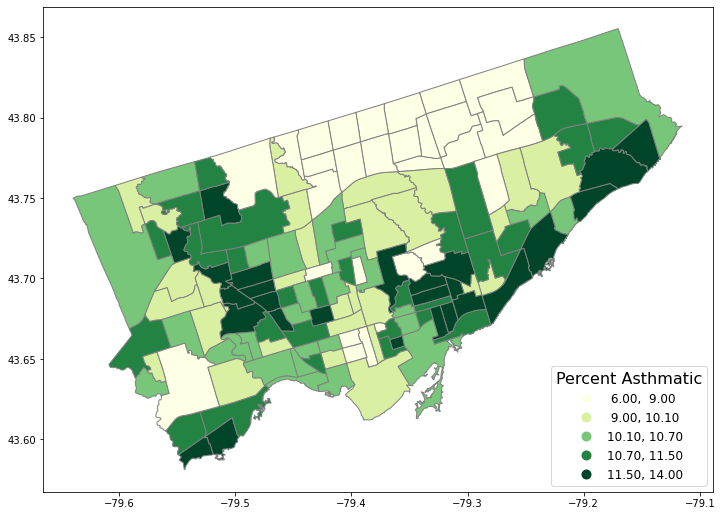

In [31]:
# First, let's create a figure variable "fig" and an axes variables called "ax".
# This code sets the stage - it says how many images - by rows/columns
# We can also set other figure attributes in here, like figure size using figsize

#import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 1, figsize = (12,12))

# Then plot the data with certain arguements:
# These two codes need to write in the same code, i.e., run simultaneously
nbrhd_simple.plot(column='asthma_pct', scheme='quantiles', 
                  k=5, cmap='YlGn', edgecolor='grey', 
                  ax = axes, legend=True, 
                  legend_kwds={'loc': 4, 'title': 'Percent Asthmatic', 
                               'title_fontsize': 16,'fontsize': 12})

Make a figure with two maps side by side...

<AxesSubplot:>

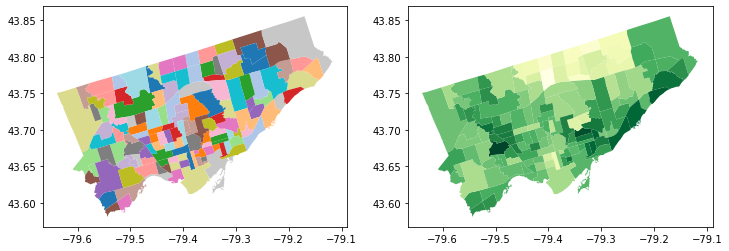

In [40]:
fig, axes = plt.subplots(1, 2, figsize = (12,12))

# pick the first cell in the figure
nbrhd_simple.plot(column = "name_x",
           ax=axes[0], cmap = "tab20")

# pick the second cell in the figure
nbrhd_simple.plot(column = "asthma_pct",
           ax=axes[1], cmap = "YlGn")



### POP QUIZ!! 

1. How would we make a figure with 3 maps in 1 row? 
2. How would we make a figure with 3 maps in 1 **column**?
3. How would we make a figure with 6 maps in 3 rows and 2 columns? 

<AxesSubplot:>

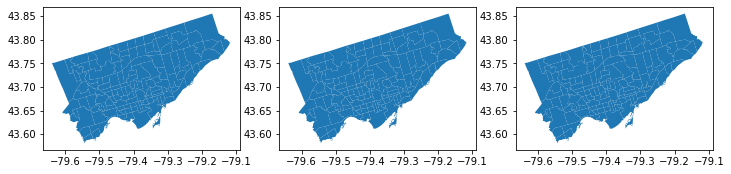

In [33]:
# 3 maps in 1 row

fig, axes = plt.subplots(1, 3, figsize = (12,12))

nbrhd_simple.plot(ax=axes[0])
nbrhd_simple.plot(ax=axes[1])
nbrhd_simple.plot(ax=axes[2])

<AxesSubplot:>

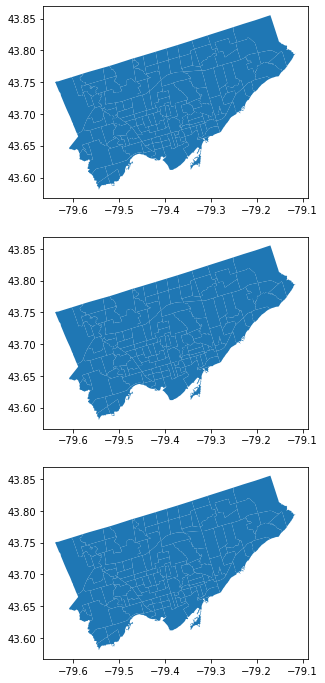

In [34]:
# 3 maps in 1 column

fig, axes = plt.subplots(3, 1, figsize = (12,12))

nbrhd_simple.plot(ax=axes[0])
nbrhd_simple.plot(ax=axes[1])
nbrhd_simple.plot(ax=axes[2])

<AxesSubplot:>

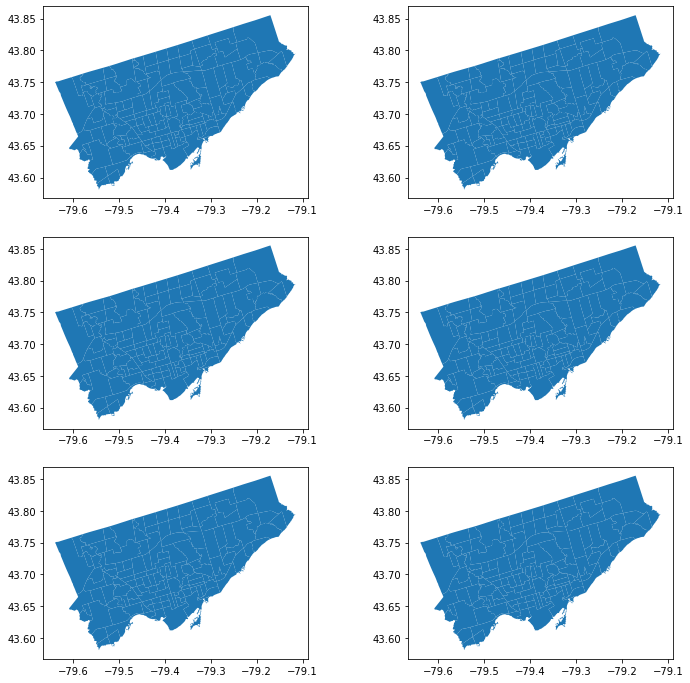

In [36]:
# 6 maps in 3 rows and 2 columns

fig, axes = plt.subplots(3, 2, figsize = (12,12))

nbrhd_simple.plot(ax=axes[0][0])
nbrhd_simple.plot(ax=axes[0][1])
nbrhd_simple.plot(ax=axes[1][0])
nbrhd_simple.plot(ax=axes[1][1])
nbrhd_simple.plot(ax=axes[2][0])
nbrhd_simple.plot(ax=axes[2][1])

# More on Cartography
## To this point we have used quantiles to classify continous values in maps. 
### What other common options do we have?  See the document of [GeoDataFrame.plot](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html) and [mapclassify](https://github.com/pysal/mapclassify/tree/main)

1. Equal Intervals
- This classification method "divides the data into equal size classes (e.g., 0-10, 10-20, 20-30, etc.) and works best on data that is generally spread across the entire range. **CAUTION**: Avoid equal interval if your data are skewed to one end or if you have one or two really large outlier values."

2. Natural Breaks
- This classification method "is a kind of “optimal” classification scheme that finds class breaks that will minimize within-class variance and maximize between-class differences." **However**, these breaks will be unique to each dataset and makes it difficult to compare across different maps. 


Before plot the variable, we usually want to see its distribution to see if certain classification can fit.

<AxesSubplot:>

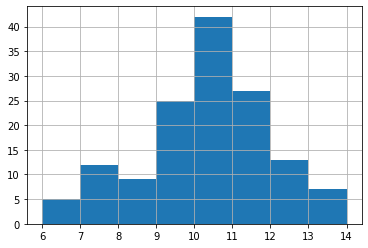

In [41]:
nbrhd_simple.asthma_pct.hist(bins=8)

Close to normal distribution, which means that the equal intervals should be fine.

Let's use the `scheme` parameter to the plot our asthma percentages using quartiles, equal intervals, and natural breaks. 

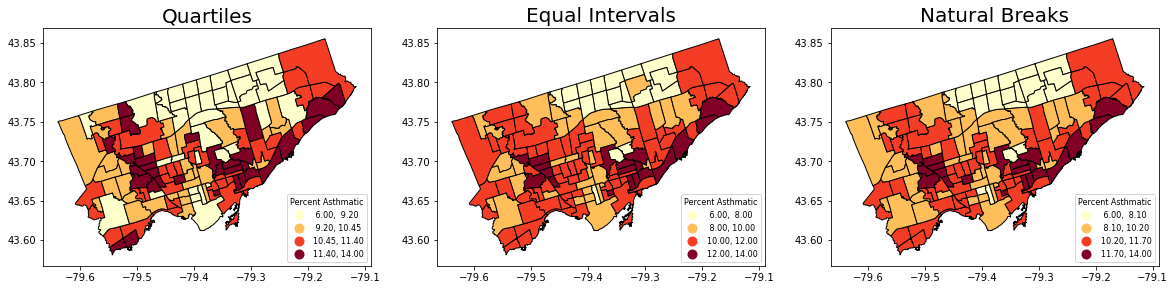

In [45]:
fig, axes = plt.subplots(1,3, figsize =  (20,10))

nbrhd_simple.plot(column='asthma_pct', scheme='Quantiles', 
                  k=4, cmap='YlOrRd', edgecolor='black', 
                  ax = axes[0], legend=True,                  
                  legend_kwds={'loc': 4, 'title': 'Percent Asthmatic', 
                               'title_fontsize': 8,'fontsize': 8})

nbrhd_simple.plot(column='asthma_pct', scheme='EqualInterval', 
                  k=4, cmap='YlOrRd', edgecolor='black', 
                  ax = axes[1], legend=True,                  
                  legend_kwds={'loc': 4, 'title': 'Percent Asthmatic', 
                               'title_fontsize': 8,'fontsize': 8})

nbrhd_simple.plot(column='asthma_pct', scheme='NaturalBreaks', 
                  k=4, cmap='YlOrRd', edgecolor='black', 
                  ax = axes[2], legend=True,                  
                  legend_kwds={'loc': 4, 'title': 'Percent Asthmatic', 
                               'title_fontsize': 8,'fontsize': 8})

axes[0].set_title("Quartiles", fontsize = 20)
axes[1].set_title("Equal Intervals", fontsize = 20)
axes[2].set_title("Natural Breaks", fontsize = 20)

current_fig = plt.gcf() #get current figure aka gcf
current_fig.savefig('asthma_three_class.png',dpi=100) #export maps as an image file!

Another way to show the figure: save it and import it to show in the presentation!
![figure](asthma_three_class.png)

## Adding a background

What if we want to add a background to our maps? It's pretty easy!

We will use the [`contextily` library](https://contextily.readthedocs.io/en/latest/) to do this. 

But first we need to double check that our coordinate reference system is properly set. To layer our maps on top of a web background map, we need to make sure the projection is set to something known as "Web Mercator": https://epsg.io/3857 

That is, make our spatial data have the *same* coordinate reference system as the web map.


In [46]:
#check current crs: WGS 84 (EPSG:4326)
nbrhd_simple.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

#### Let's reproject the map into Web Mercator and compare to the original projection:

Text(0.5, 1.0, 'Polar')

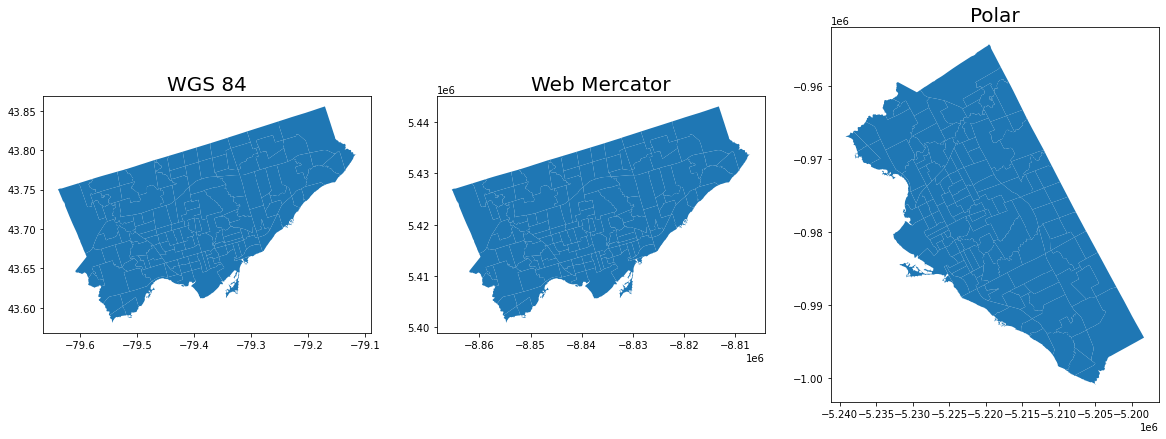

In [47]:
nbrhd_webmap = nbrhd_simple.to_crs("EPSG:3857")

#let's throw in a polar projection just for fun! 
## https://www.esri.com/arcgis-blog/products/imagery/imagery/two-views-from-the-top-of-the-world/
nbrhd_polar = nbrhd_simple.to_crs("EPSG:3995")

fig, axes = plt.subplots(1,3, figsize =  (20,10))

#original
nbrhd_simple.plot(ax = axes[0])
#web mercator
nbrhd_webmap.plot(ax = axes[1])
#polar projection
nbrhd_polar.plot(ax = axes[2])

axes[0].set_title("WGS 84", fontsize = 20)
axes[1].set_title("Web Mercator", fontsize = 20)
axes[2].set_title("Polar", fontsize = 20)

Note: The coordinate reference system will change how the geometry is plotted in a 2D map.

### To add the web basemap, we can do the following

Remember we have import the `contextily` package as `cx`

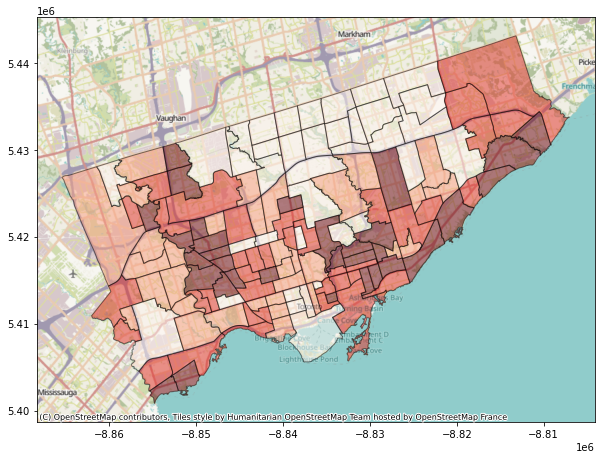

In [48]:
fig, axes = plt.subplots(1,1, figsize = (10,10))

#alpha parameter makes the map transparent
nbrhd_webmap.plot(column = "asthma_pct", scheme = "quantiles",
                  k = 4, cmap = "Reds", ax = axes,
                  alpha=0.5, edgecolor='k')

cx.add_basemap(axes)

The `contextily` pacakage also provides different map source.

For example,
```
Under the provider of CartoDB:
- Positron
- PositronNoLabels 
- PositronOnlyLabels 
- DarkMatter 
- DarkMatterNoLabels 
- DarkMatterOnlyLabels 
- Voyager 
- VoyagerNoLabels
- VoyagerOnlyLabels
- VoyagerLabelsUnder
```

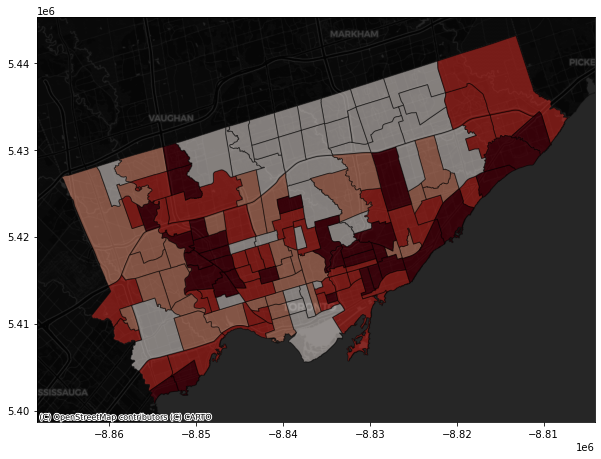

In [50]:
fig, axes = plt.subplots(1,1, figsize = (10,10))

#alpha parameter makes the map transparent
nbrhd_webmap.plot(column = "asthma_pct", scheme = "quantiles",
                  k = 4, cmap = "Reds", ax = axes,
                  alpha=0.5, edgecolor='k')

cx.add_basemap(axes,
              source=cx.providers.CartoDB.DarkMatter)

## What else? We can visualize the data analysis results together!

Recall we've conducted a linear regression on the correlation between asthma and immigration.

We can plot the data description, spatial distribution, and linear regression togehter.


### 1. load in the immigration data

In [51]:
fname = '1_socdem_neighb_2006-2.xls'
sname = 'socdem_2006'
socdem_neighb = pd.read_excel(fname, sheet_name = sname, header = 10)
socdem_neighb.head()

,Neighbourhood id,Neighbourhood Name,Total Population,% 19 and under,% 65 and over,% Living alone,% Aged 65+ living alone,% Lone parent families §,% 1 year mobility in population,Median household income before-tax $,...,% Less than high school education **,% With a University degree **,% No knowledge of English/French,% Recent immigrants-within 5 years,% Recent immigrants-within 10 years,% Immigrants,% Visible minority,"Top 3 Home Languages for non-English speaking households, #1","Top 3 Home Languages for non-English speaking households, #2","Top 3 Home Languages for non-English speaking households, #3"
0,1,West Humber-Clairville,32252,26.8,11.3,3.7,11.7,26.3,11.6,63413,...,18.4,22.9,5.4,12.2,22.1,60.0,77.9,Panjabi (Punjabi),Gujarati,Spanish
1,2,Mount Olive-Silverstone-Jamestown,32127,32.2,8.1,4.1,15.4,31.5,15.7,48146,...,20.1,23.6,7.6,22.2,35.1,67.1,85.3,Panjabi (Punjabi),Gujarati,Arabic
2,3,Thistletown-Beaumond Heights,9928,25.3,16.7,5.4,17.5,30.1,10.9,55032,...,16.7,20.7,5.0,9.7,19.3,55.9,53.8,Panjabi (Punjabi),Italian,Spanish
3,4,Rexdale-Kipling,10725,23.6,18.3,10.2,28.8,33.3,13.2,52428,...,15.3,18.8,3.0,8.3,14.0,47.2,41.8,Spanish,Panjabi (Punjabi),Croatian
4,5,Elms-Old Rexdale,9437,29.9,10.5,5.8,13.0,39.1,9.7,53779,...,15.2,18.8,3.6,9.8,18.2,53.8,60.5,Spanish,Italian,Urdu


In [52]:
socdem_neighb.columns

Index(['Neighbourhood id', 'Neighbourhood Name', 'Total Population',
       '% 19 and under', '% 65 and over', '% Living alone',
       '% Aged 65+ living alone', '% Lone parent families §',
       '% 1 year mobility in population',
       'Median household income before-tax $',
       'Median household income after-tax $ ‡',
       '% Families-Incidence of low income before-tax',
       '% Families-Incidence of low income after-tax ‡',
       '% Individuals-Incidence of low income before-tax',
       '% Individuals-Incidence of low income after-tax ‡',
       '% Rented Dwellings', '% Unemployment rate *',
       '% Not in labour force *', '% Less than high school education **',
       '% With a University degree **', '% No knowledge of English/French',
       '% Recent immigrants-within 5 years',
       '% Recent immigrants-within 10 years', '% Immigrants',
       '% Visible minority',
       'Top 3 Home Languages for non-English speaking households, #1',
       'Top 3 Home Languages 

In [53]:
# Important columns
important_cols = socdem_neighb.columns[[0, 1, 10, 21]]

rename_dic = {
    important_cols[0]: 'Neighbid',
    important_cols[1]: 'name',
    important_cols[2]: 'median_income',
    important_cols[3]: 'immigration5'
}
rename_dic

{'Neighbourhood id': 'Neighbid',
 'Neighbourhood Name': 'name',
 'Median household income after-tax $ ‡': 'median_income',
 '% Recent immigrants-within 5 years': 'immigration5'}

In [54]:
# Select important columns
socdem_neighb = socdem_neighb.copy()
socdem_neighb = socdem_neighb[important_cols]
socdem_neighb.rename(columns = rename_dic, inplace = True)
socdem_neighb.head()

,Neighbid,name,median_income,immigration5
0,1,West Humber-Clairville,56220,12.2
1,2,Mount Olive-Silverstone-Jamestown,43975,22.2
2,3,Thistletown-Beaumond Heights,49800,9.7
3,4,Rexdale-Kipling,46033,8.3
4,5,Elms-Old Rexdale,48055,9.8


### 2. Merge dataset

Merge `socdem_neighb` to `nbrhd_webmap`, because we want to map it on a basemap.

In [55]:
nbrhd_webmap = nbrhd_webmap.merge(socdem_neighb, on='Neighbid')

nbrhd_webmap.head()


,name_x,nbrhd_spat_id,geometry,Neighbid,name_y,adult_pop,asthma_pct,name,median_income,immigration5
0,Casa Loma (96),096,"POLYGON ((-8840403.206 5415116.967, -8840420.5...",96,Casa Loma,6640,10.1,Casa Loma,59151,4.9
1,Annex (95),095,"POLYGON ((-8838115.394 5414318.191, -8838308.4...",95,Annex,20869,9.5,Annex,46012,4.7
2,Caledonia-Fairbank (109),109,"POLYGON ((-8845470.121 5416294.143, -8845495.7...",109,Caledonia-Fairbank,6615,11.3,Caledonia-Fairbank,46712,7.6
3,Woodbine Corridor (64),064,"POLYGON ((-8829288.812 5414013.407, -8829483.7...",64,Woodbine Corridor,8346,13.0,Woodbine Corridor,49287,4.5
4,Lawrence Park South (103),103,"POLYGON ((-8839987.390 5419761.937, -8840063.9...",103,Lawrence Park South,9709,10.7,Lawrence Park South,99440,2.5


### 3. conduct linear regression

In [56]:
from statsmodels.formula.api import ols
reg_asthmaimm = ols('asthma_pct ~ immigration5', data = nbrhd_webmap) # setup the model
reg_asthmaimm_fit = reg_asthmaimm.fit()
reg_asthmaimm_sum = reg_asthmaimm_fit.summary()
reg_asthmaimm_sum.tables[1]


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,11.8266,0.218,54.328,0.000,11.396,12.257
immigration5,-0.1597,0.019,-8.475,0.000,-0.197,-0.122


### 4. Visualize the results

The regression analysis shows a significant coefficient of immigration percent, indicating a significant linear relationship.

Therefore, we can visualize these two variables as a scatter plot and regressed line.

What else do we want?

- data description of the dependent variable

- map both variables

Then we can plot the four figures in a (2,2) manner.

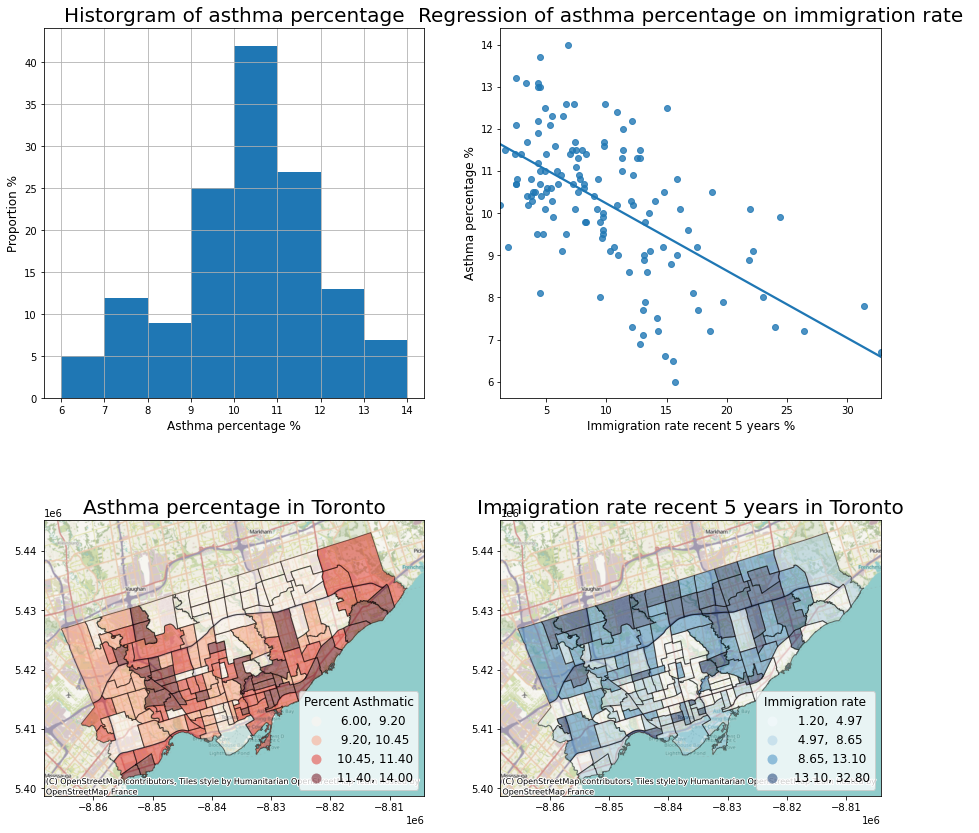

In [57]:
fig, axes = plt.subplots(2,2, figsize = (15,15))

# Description of the dependent variable
nbrhd_simple.asthma_pct.hist(bins=8, ax=axes[0][0])

# Regression
import seaborn as sns
sns.regplot(y = 'asthma_pct', x = 'immigration5', data = nbrhd_webmap, ci = None, ax=axes[0][1])


# Map of the dependent variable
nbrhd_webmap.plot(column = "asthma_pct", scheme = "quantiles",
                  k = 4, cmap = "Reds", ax = axes[1][0],
                  alpha=0.5, edgecolor='k',legend = True,
                 legend_kwds={'loc': 4, 'title': 'Percent Asthmatic', 
                               'title_fontsize': 12,'fontsize': 12})
cx.add_basemap(axes[1][0])

# Map of the independent variable
nbrhd_webmap.plot(column = "immigration5", scheme = "quantiles",
                  k = 4, cmap = "Blues", ax = axes[1][1],
                  alpha=0.5, edgecolor='k',legend = True,
                 legend_kwds={'loc': 4, 'title': 'Immigration rate', 
                               'title_fontsize': 12,'fontsize': 12})
cx.add_basemap(axes[1][1])

# Make some adjustment
axes[0][0].set_title("Historgram of asthma percentage", fontsize = 20)
axes[0][0].xaxis.set_label_text('Asthma percentage %')
axes[0][0].xaxis.get_label().set_fontsize(12)
axes[0][0].yaxis.set_label_text('Proportion %')
axes[0][0].yaxis.get_label().set_fontsize(12)

axes[0][1].set_title("Regression of asthma percentage on immigration rate", fontsize = 20)
axes[0][1].xaxis.set_label_text('Immigration rate recent 5 years %')
axes[0][1].xaxis.get_label().set_fontsize(12)
axes[0][1].yaxis.set_label_text('Asthma percentage %')
axes[0][1].yaxis.get_label().set_fontsize(12)

axes[1][0].set_title("Asthma percentage in Toronto", fontsize = 20)
axes[1][1].set_title("Immigration rate recent 5 years in Toronto", fontsize = 20)


current_fig = plt.gcf() 
current_fig.savefig('results.png',dpi=100) #export maps as an image file!

![results](results.png)

# Introduction to clustering

## What is clustering? 

Clustering, generally, is the act of grouping similar things with eachother.

We can do this with non-spatial data as well as spatial data. 

One common clustering method is k-means, which we won't cover in this class, but if you're interested, there's a nice tutorial on the method here: 

https://towardsdatascience.com/machine-learning-algorithms-part-9-k-means-example-in-python-f2ad05ed5203


## Why do we want to identify clusters? 

Because clusters identify groups of data with similar attribute values, we can use it to begin to understand what **drives** the grouping. 

For example, we may have data on individuals' income outcomes and education levels (e.g., total number of years in schools, colleges, and universities). 

If we perform a cluster analysis, we can identify discrete groups which may be easier to work with when we want to do further analysis. 

These groups may be something like:

 - cluster 1: high income, more education
 - cluster 2: high income, less education
 - cluster 3: low income, less education
 - cluster 4: low income, more education


 
From there, we can look at other attributes of those clusters. 

This approach is commonly used in demographic analysis where many attributes are considered to create discrete clusters. 

A good example of this used in practice is Environics Analytics PRIZM Segmentation:

https://environicsanalytics.com/en-ca/data/segmentation

![example of different segments](https://environicsanalytics.com/images/default-source/product-pages/page-content/prizm-page-illustrations-cards.png)

[You can look up what 'demographic segment' or cluster your postal code belongs to here!](https://prizm.environicsanalytics.com/?_ga=2.84764121.114697395.1648300904-78433696.1648300904)

### Spatial clustering, at a high level, is doing the same thing but one attribute to consider is geography. 

Spatial clustering involves looking at:

- how some attribute is expressed across space; 

- whether similar attribute values are near each other. 

#### If we want to do 'spatial clustering' of a variable what two pieces of information do we need? (don't over think!!!)

## Autocorrelation

Autocorrelation literally means 'self correlations'. 

So instead of looking at how two attributes relate to each other (e.g., regression), we want to explore one a single attribute relates to its neighbours.

Typically, we're talking about temporal autocorrelation or spatial autocorrelation.

## Spatial Autocorrelation

How does a variable value in a specific location correlate with the variable values in its neighbours?

- regress a value on the values of its neighbours!

#### So again, information do we need to do answer this question?

### 1) For each observation (in this case, neighborhood) we need to know their neighbours!

To do this we can create something known as a 'weights matrix'.

A weights matrix is a matrix that describes whether or not any one observation is 'neighbours' with another.

There are many ways we can do this, but let's focus on two common ones: queens contiguity matrix and the rook contiguity matrix:

![weights matrices](https://i.stack.imgur.com/CWIHi.jpg)

### 2) Next we need to describe the value of our attribute of interest in neighbours

To do this we create a variable known as 'spatial lag'. 

Spatial lag for neighbourhood *i* is often just the average of some attribute value across all of neighbourhood *i*'s neighbours (as determined by our weights matrix!).

### 3) Finally, now we can see how a neighbourhood's attribute compares to its neighbours. 

This set up allows us to see if neighbourhood's with high attribute values are next to other neighbourhoods with high values. 

We can then use a number of statistical tests to determine if there are 'significant' clusters in our dataset. 



### We will talk about the code to show how this works next week.